# Cooling and solidificaion of a lake

In [1]:
# numerical preliminaries - import components which will be needed for this exercise
import math as m
import numpy as np
import matplotlib.pyplot as plt

### Exercise 2.1: Lake cooling

Let's numerically solve a problem we can also solve analytically to ensure we're happy with our numerical solutions.

Consider the cooling of a lake of depth $H$ and surface area $A$.  The surface is cooled to temperature $T_s$ and the interior is initially at temperature $T_0 \gg T_s$.  This surface cooling drives a turbulent heat flux from the surface, such that the interior is turbulently well-mixed with temperature $T(t)$ which varies in time $t$.

Global conservation  of energy, balancing the cooling of the lake with the convective flux from the surface, may be expressed as
$$
\rho c_p H \frac{dT}{dt} = - \lambda k \left(\frac{\rho_0 g \alpha}{\kappa \mu}\right)^{1/3}(T-T_s)^{4/3},
$$
where $\rho$ is the water density, $c_p$ the specific heat capacity, $\lambda$ is a dimensionless heat transfer coefficient, $k = \rho c_p \kappa$ is the thermal conductivity, $\kappa$ is the thermal diffusivity, $g$ is the gravitational acceleration and $\mu$ is the dynamic viscosity.

In class we discussed scaling the equation above, using scales
$$
T-T_s \sim \Delta T = T_0-T_s \quad \mbox{and} \quad t \sim \frac{H^2}{\kappa}\frac{1}{\lambda}\left(\frac{\kappa \mu}{\rho c_p \alpha \Delta T H^3}\right)^{1/3},$$
from which we defined the dimensionless variable $\theta = (T-T_s)/\Delta T$, which has initial condition $\theta(0) = 1$ and obeys the non-dimensional equation
$$
\frac{d\theta}{dt} = -\theta^{4/3}.
$$
This 1st order ODE is separable, and has solution
$$
\theta = (1 + t/3)^{-3}.
$$

(i) draw a schematic of the lake convection problem, including a temperature profile and the heat flux through the top thermal boundary layer.

(ii) Adapt the mid-point Euler code to solve for the non-dimensional temperature in the lake as a function of time.  The mid-point Euler method from your numerical exercises is copied below for reference (it solves for simple exponential decay).

(iii) Plot both your numerical solution and the analytical solution provided above.  Describe the behaviour of your solutions physically.

<span style='color:green'>
We have worked through the scaling and the analytical solution in class.  The following is a mid-point Euler code which solves a single first order ordinary differential equation.
</span>

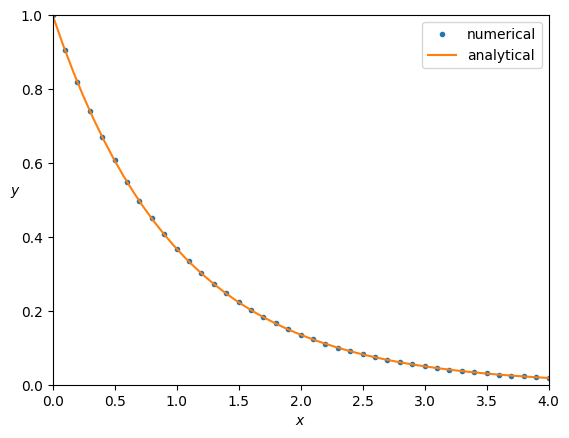

In [12]:
# mid-point Euler method code - you should adapt this to solve the lake problem.  It currently solves for exponential decay.

L = 4     # length of domain
N = 40    # number of grid points on domain
dx = L/N  # step length

def f(x, y):
    return -y       # The derivative of y(x) as a function of x and y

x = np.arange(0, L+dx , dx) # Numerical grid
y = np.zeros(len(x))      # Corresponding grid of y values

y[0] = 1  # Initial condition

for i in range(0, N):
    ym = y[i] + (dx/2)*f(x[i], y[i])         # Simple euler step to the half-way point
    y[i + 1] = y[i] + dx*f(x[i] + dx/2, ym)  # Full step using derivatives evaluated at the mid point

# exact solution
xx = np.linspace(0,L)
yy = np.exp(-xx)

fig, ax = plt.subplots()
p1 = ax.plot(x,y, '.', label='numerical')
p2 = ax.plot(xx,yy, label = 'analytical')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$', rotation=0)
ax.legend()
ax.set_xlim([0,L])
ax.set_ylim([0,1])
plt.show()

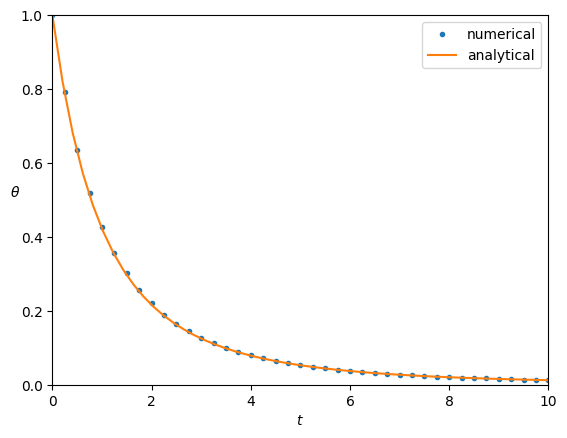

In [13]:
# mid-point Euler method code - you should adapt this to solve the lake problem.  It currently solves for exponential decay.

L = 10     # length of domain
N = 40   # number of grid points on domain
dx = L/N  # step length

def f(x, y):
    return -y**(4/3)       # The derivative of y(x) as a function of x and y

x = np.arange(0, L+dx , dx) # Numerical grid
y = np.zeros(len(x))      # Corresponding grid of y values

y[0] = 1  # Initial condition

for i in range(0, N):
    ym = y[i] + (dx/2)*f(x[i], y[i])         # Simple euler step to the half-way point
    y[i + 1] = y[i] + dx*f(x[i] + dx/2, ym)  # Full step using derivatives evaluated at the mid point

# exact solution
xx = np.linspace(0,L)
yy = (1+(xx/3))**(-3)

fig, ax = plt.subplots()
p1 = ax.plot(x,y, '.', label='numerical')
p2 = ax.plot(xx,yy, label = 'analytical')
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$\theta$', rotation=0)
ax.legend()
ax.set_xlim([0,L])
ax.set_ylim([0,1])
plt.show()

### Exercise 2.2: cooling and solidification of ice on the lake

Consider the solidification of ice on a lake of depth $H$ and cross-sectional area $A$.  The surface temperature is fixed at $T_s < T_m$, where $T_m$ is the melting temperature of ice.  The surface is at $z = 0$ and ice grows to a thickness $a(t)$, which you should calculate.  The interior of the lake starts at temperature $T_0 > T_m$ and cools over time.  

(i) draw a diagram of the lake, with a layer of ice of thickness $a(t)$ at the top.  Label the surface temperature $T_s$, the temperature of the ice-water interface $T_m$ and the temperature of the water in the interior of the lake $T(t)$.

(ii) Write down the Stefan condition for solidification rate of the crust, $\dot{a}$, using a quasi-stationary approximation for the heat flux in the solid and approximating the heat flux from convection as
$$
F = -\lambda k \left(\frac{\rho_0 g \alpha}{\kappa\mu}\right)^{1/3}(T-T_m)^{4/3},
$$
where $\lambda$ is a heat transfer coefficient, $k$ is the thermal conductivity, $\rho_0$ is the reference density, $g$ is the gravitational acceleration, $\alpha$ is the coefficient of thermal expansion, $\kappa$ is the thermal diffusivity and $\mu$ is the fluid viscosity.

(iii) Write down a statement of global heat conservation in the liquid beneath the ice, including the heat flux from the liquid to the solidifying ice-water interface.

(iv) Scale your equations using $a \sim H$, $T - T_m \sim \Delta T = T_m - T_s$ and use a time scale $t \sim {\cal S}H^2/\kappa$ for suitably chosen Stefan number {\cal S}.  Your non-dimensional equations should then be a function solely of the initial dimensionless temperature $\theta_0$ and a dimensionless parameter proportional to the Rayleigh number.

(v) Solve the resultant coupled, first order differential equations numerically and interpret your results.  You may wish to examine the early-time asymptotics and start your numerical integration not at $t = 0$, but instead at $t = dt$, where $dt \ll 1$.

In [ ]:
# mid-point Euler method code - you should adapt this to solve the lake problem.  It currently solves for exponential decay.

L = 10     # length of domain
N = 40   # number of grid points on domain
dt = 10**(-3)  # step length
F = 50
S = 10

def f1(t, a, theta):
    return 1/a - F*theta**(4/3)      

def f2(t, a, theta):
    return (- F*S*theta**(4/3))/(1-a)  



t = np.arange(dt, L+dt , dt) # Numerical grid
theta = np.zeros(len(t))      # Corresponding grid of y values

theta[0] = 2  # Initial condition

for i in range(0, N):
    theta_m = theta[i] + (dt/2)*f(t[i], theta[i])         # Simple euler step to the half-way point
    theta[i + 1] = theta[i] + dt*f(t[i] + dt/2, theta_m)  # Full step using derivatives evaluated at the mid point

# exact solution
tt = np.linspace(0,L)
exact_theta = (theta[0]**(-1/3)+((F*S*t)/3)


fig, ax = plt.subplots()
p1 = ax.plot(x,y, '.', label='numerical')
p2 = ax.plot(xx,yy, label = 'analytical')
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$\theta$', rotation=0)
ax.legend()
ax.set_xlim([0,L])
ax.set_ylim([0,1])
plt.show()

In [16]:
# mid-point Euler method code - you should adapt this to solve the lake problem.  It currently solves for exponential decay.

L = 10     # length of domain
N = 40   # number of grid points on domain
#dt = L/N  # step length
F = 50
S = 10
dt = 10**(-3)  # step length

# Early times
t = 0
y1[0] = 0
y2[0] = 2
y1[1] = np.sqrt(2*dt)
y2[1] = (theta0**(-1/3)+((F*S*delta_t)/3))**(-3)

def f1(t, y1, y2):
    return 1/y1 - F*y2**(4/3)      

def f2(t, y1, y2):
    return (- F*S*y2**(4/3))/(1-y1)  

for i in range(0, N):
    y1[i + 2] = y2[i] + (dt/2)*f1(t[i], y2[i])         # Simple euler step to the half-way point
    y2[i + 2] = y2[i] + dt*f2(t[i] + dt/2, y2_m)  # Full step using derivatives evaluated at the mid point

# exact solution
tt = np.linspace(0,L)
exact_y1 = np.sqrt(2*dt)
exact_y2 = (theta0**(-1/3)+((F*S*delta_t)/3))**(-3)


fig, ax = plt.subplots()
p1 = ax.plot(tt,y1, y2,'.', label='numerical')
p2 = ax.plot(tt,exact_y1,exact_y2,'.', label = 'analytical')
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$\theta$', rotation=0)
ax.legend()
ax.set_xlim([0,L])
ax.set_ylim([0,10])
plt.show()

NameError: name 'y1' is not defined

In [8]:
# mid-point Euler method code - you should adapt this to solve the lake problem.  It currently solves for exponential decay.

L = 10     # length of domain
N = 40   # number of grid points on domain
#dt = L/N  # step length
F = 50
S = 10
theta0 = 2
delta_t = 10**(-3)  # step length

def f1(t, y1, y2):
    return 1/y1 - F*y2**(4/3)      

def f2(t, y1, y2):
    return (- F*S*y2**(4/3))/(1-y1)  


# Early times
t = 0
a = 0
theta = theta0
t = np.append(t, delta_t)
a = np.append(a, np.sqrt(2*delta_t))
theta = np.append(theta, (theta0**(-1/3)+((F*S*delta_t)/3))**(-3))

In [9]:
t

array([0.   , 0.001])

In [10]:
a

array([0.        , 0.04472136])